In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/krishnaik06/EDA1/master/titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info(),df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(None, (891, 12))

In [5]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [6]:
df.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

<AxesSubplot:>

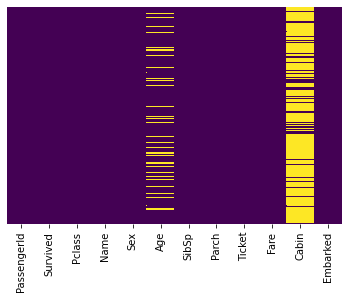

In [7]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")

In [8]:
# print(df.isna().any())
# sns.heatmap(df.isna(),yticklabels=False,cbar=False,cmap="viridis")

In [9]:
print(df['Age'].isna().sum())

177


In [10]:
df['Age'].max(),df['Age'].min()

(80.0, 0.42)

Sex
female    AxesSubplot(0.125,0.125;0.775x0.755)
male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

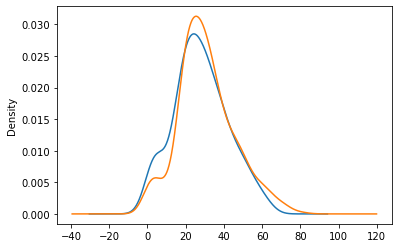

In [11]:
df.groupby('Sex').Age.plot(kind='kde')

In [12]:
my_df  = pd.DataFrame()
bins= [0,2,4,13,20,110]
labels = ['Infant','Toddler','Kid','Teen','Adult']
my_df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

C:\Users\raghavg\Anaconda3\envs\ml_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

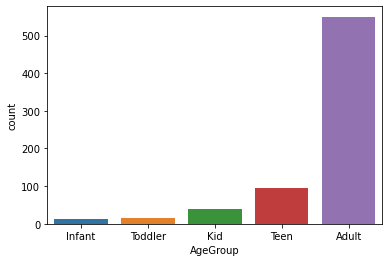

In [13]:
sns.countplot('AgeGroup',data=my_df)

In [14]:
df=pd.get_dummies(df, columns=["Sex"],drop_first=True)
df=pd.get_dummies(df, columns=["Embarked"],drop_first=True)

In [15]:
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,1,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,1,0,0


In [16]:
print(df['Cabin'].isna().sum())

687


In [17]:
df.drop(['Name','PassengerId','Cabin','Ticket'],axis=1,inplace=True)

In [18]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


C:\Users\raghavg\Anaconda3\envs\ml_env\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


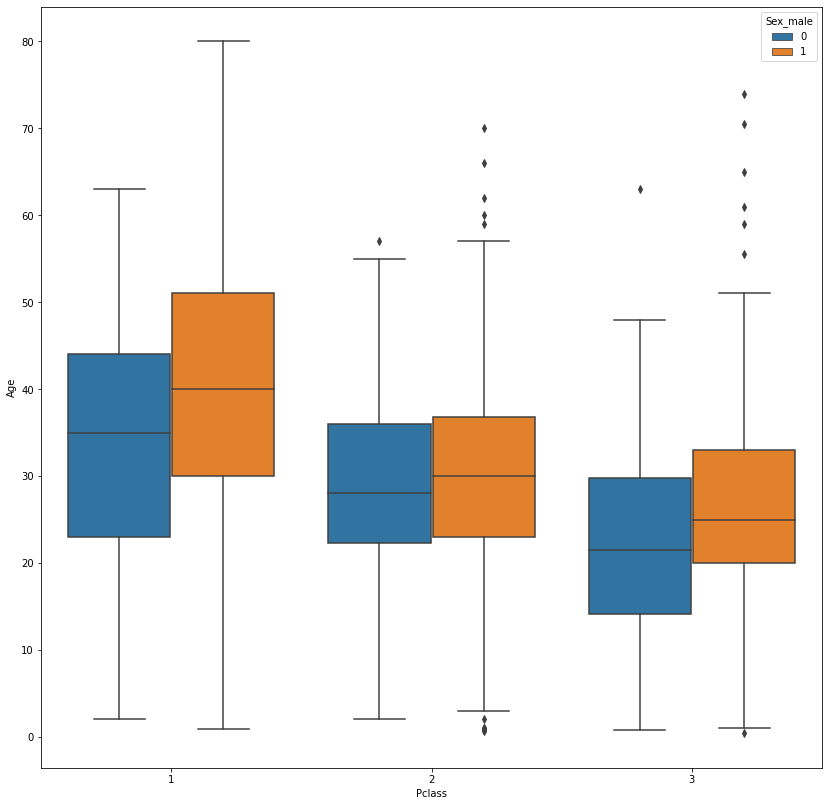

In [19]:
plt.figure(figsize=(14,14))

graph=sns.boxplot('Pclass',"Age",data=df,hue="Sex_male")

In [20]:
df.dtypes

Survived        int64
Pclass          int64
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Sex_male        uint8
Embarked_Q      uint8
Embarked_S      uint8
dtype: object

In [21]:
fun=df[['Age','Pclass','Sex_male']]
fun

,Age,Pclass,Sex_male
0,22.0,3,1
1,38.0,1,0
2,26.0,3,0
3,35.0,1,0
4,35.0,3,1
...,...,...,...
886,27.0,2,1
887,19.0,1,0
888,NaN,3,0
889,26.0,1,1


In [22]:
def age_replace(fun):
    updated=fun.copy()
    for i in range(len(updated)):
        age=updated.iloc[i][0]
        pclass=updated.iloc[i][1]
        sex_male=updated.iloc[i][2]
        
        if pd.isnull(age):
        
            if pclass==1:
                if sex_male==0:
                    updated['Age'][i]=35
                else:
                    updated['Age'][i]=40
                    
            elif pclass==2:
                if sex_male==0:
                    updated['Age'][i]=28
                else:
                    updated['Age'][i]=30
                    
            elif pclass==3:
                if sex_male==0:
                    updated['Age'][i]=22
                else:
                    updated['Age'][i]=25
                    
    return updated

In [23]:
pd.options.mode.chained_assignment = None  # default='warn'

updated=age_replace(fun)

In [24]:
df['Age']=updated['Age']

In [25]:
df.isnull().any()

Survived      False
Pclass        False
Age           False
SibSp         False
Parch         False
Fare          False
Sex_male      False
Embarked_Q    False
Embarked_S    False
dtype: bool

## Ready for Model

In [26]:
X=df[['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Embarked_Q', 'Embarked_S']]
y=df['Survived']

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [28]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [29]:
pred=clf.predict(X_test)

In [30]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [31]:
confusion_matrix=confusion_matrix(y_test,pred)

In [32]:
confusion_matrix

array([[116,  18],
       [ 24,  65]], dtype=int64)

In [33]:
accuracy=accuracy_score(y_test,pred)
accuracy

0.8116591928251121